
## 주성분분석 Principal Component Analysis

+ 자료의 요약이나 '선형관계식'을 통해 '차원수'를 감소시켜 데이터해석을 용이하게 하는데 주안점

+ 서로 상관이 없거나 독립적인 새로운 변수들을 이용해서 정보손실을 최소화하도록 함


#### 둘 이상의 양적변수 사이에서 분산/공분산 관계를 이용하여 변수들의 선형결합으로 나타나는 주성분을 찾고, 이 중 중요한 n개의 주성분으로 전체변동의 대부분을 설명하고자 하는 다변량 분석법
+ 예를 들어, 8x8크기의 손글씨 데이터의 경우 총 64개의 특성으로 구성되어 있는데, 글씨가 쓰여진 영역만 따로 골라서 분석에 활용한다면 64개의 특성이 모두 다 필요한 것은 아님

<img src='img/pca.gif'>

### 차원축소 방법 - 투영/사영projection
+ #### 먼저, 데이터에 임의의 초평면을 정의한 다음 데이터들을 이 평면에 투영함
+ #### 그런 다음, 데이터의 분산이 최대로 보존되는지 확인


#### PCA를 이용해 고차원의 데이터를 정보손실없이 변환함으로써 시각화가 편리해지고 데이터의 크기가 감소함으로써 빠른 학습이 가능해짐
#### PCA 분석을 위해 공분산/고유벡터/고유값에 대한 개념 필요 - 선형대수

### 주성분 분석 순서
+ 데이터를 표준화/정규화한 후 각 변수간 공분산을 구함
+ 이를 이용해 고유값/고유벡터를 구함
+ 분산이 큰 고유벡터를 찾아 데이터를 이것에 투영해서 그 결과값들을 분석이나 시각화에 사용

#### iris 데이터셋을 이용하여 주성분 분석 실시

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_iris

#### 데이터 적재

In [5]:
iris = load_iris()
data = iris.data
target = iris.target

#### 전처리

In [7]:
data = StandardScaler().fit_transform(data)

#### 공분산 계산
+ 각 독립변수(특성) 별 상관관계 파악
+ 그러기 위해서는 특성들을 전치행렬로 변환해야 함
+ 전치행렬은 객체명.T로 간단히 만들 수 있음

In [10]:
cov_matrix = np.cov(data.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

#### 공분산의 고유값/고유벡터 계산
+ numpy에서 linalg.eig 함수 제공

In [12]:
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval, eigvec

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

#### 데이터의 차원을 1차원으로 변환했을 때 73%

In [13]:
eigval/sum(eigval)

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

#### 2차원으로 변환하는 경우 73+23% 정도로 고유데이터의 분산을 유지할 수 있음

#### 고유값을 이용해서 적절한 주성분 개수 선택
+ 스크리scree 그래프 이용

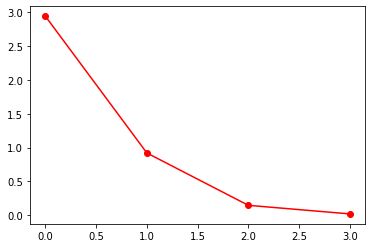

In [14]:
plt.plot(eigval, 'ro-')

#### 투영한 결과를 데이터프레임에 생성
+ 즉, 4차원 데이터를 고유벡터로 투영함
+ A벡터를 B벡터에 투영했을 때 투영된 벡터의 길이를 구하는 공식
+ -> x.y / || y ||
+ x.y -> np.dot(x,y)
+ || y || -> np.linalg.norm(y)

In [19]:
projX1 = data.dot(eigvec.T[0]) / np.linalg.norm(eigvec.T[0])
result = pd.DataFrame(projX1, columns=['PC1'])

In [21]:
projX2 = data.dot(eigvec.T[1]) / np.linalg.norm(eigvec.T[1])
result['PC2'] = projX2

In [22]:
result['target'] = target

#### 기존 변수로 시각화

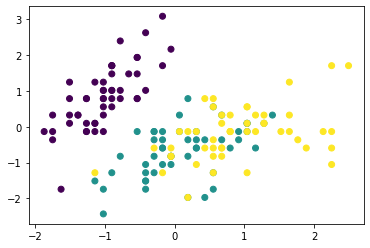

In [24]:
plt.scatter(data[:, 0], data[:, 1], c=target)  # sepal

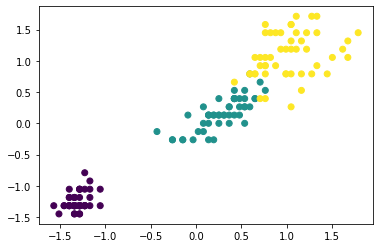

In [25]:
plt.scatter(data[:, 2], data[:, 3], c=target) # petal

#### 주성분 분석 후 시각화

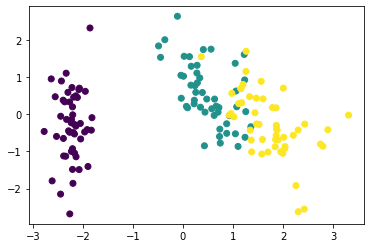

In [23]:
plt.scatter(result.PC1, result.PC2, c=target)

#### sklearn으로 PCA 분석
+ n_components : 주성분 개수 지정

In [26]:
pca = PCA(n_components=2)
pcaXY = pca.fit_transform(data)

In [28]:
result = pd.DataFrame(pcaXY, columns=['PC1', 'PC2'])
result['target'] = target

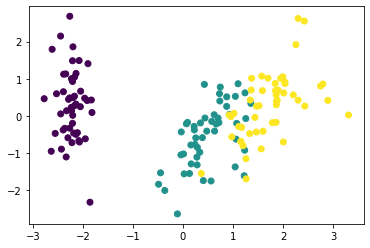

In [30]:
plt.scatter(result.PC1, result.PC2, c=result.target)

#### 89구역 54개의 공원 잔디식물종 분석
+ 1 ~ 54 컬럼만 추출해서 주성분분석 실시
+ plot : 실험조건
+ species : 식물종
+ hay : 건초
+ pH : 토양산성도

In [67]:
pg = pd.read_csv('data/pgfull.txt', sep='\t')

In [68]:
pg.head()

,AC,AE,AM,AO,AP,AR,AS,AU,BH,BM,...,TO,TP,TR,VC,VK,plot,lime,species,hay,pH
0,2.51,1.18,0.45,0.91,0.47,0.00,0.0,0.00,0.0,0.06,...,0.10,0.04,0.00,0.00,0.0,1.0,1,33,5.105,7.0
1,6.85,0.10,0.58,1.02,0.35,0.00,0.0,0.00,0.0,0.36,...,0.14,0.00,0.00,0.00,0.0,1.0,2,31,6.455,6.2
2,10.58,0.11,0.21,1.85,0.00,0.00,0.0,0.00,0.0,0.00,...,0.02,0.06,0.00,0.00,0.0,1.0,3,33,4.870,5.3
3,13.65,0.00,0.00,6.46,0.00,0.00,0.0,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.0,1.0,4,10,2.160,4.0
4,4.84,0.00,1.49,0.36,0.10,0.06,0.0,0.02,0.0,0.90,...,0.08,0.68,0.48,0.01,0.0,2.1,1,42,4.620,7.0


In [105]:
pg.species.value_counts()

27    7
34    7
28    6
29    5
30    4
22    4
32    4
33    4
37    4
36    3
26    3
23    3
4     3
10    3
42    3
14    3
31    2
19    2
25    2
21    2
18    2
15    2
24    2
13    2
44    1
17    1
3     1
16    1
39    1
5     1
6     1
Name: species, dtype: int64

In [122]:
data = pg.iloc[:,0:54]

In [72]:
target = pg.iloc[:, 56]

In [73]:
data = StandardScaler().fit_transform(data)

In [74]:
cov_matrix = np.cov(data.T)
cov_matrix

array([[ 1.01136364, -0.44250256,  0.30363168, ..., -0.0900217 ,
        -0.16988853,  0.06115835],
       [-0.44250256,  1.01136364, -0.26457035, ..., -0.09738512,
        -0.08087617,  0.04703134],
       [ 0.30363168, -0.26457035,  1.01136364, ...,  0.16084868,
         0.299318  ,  0.14000338],
       ...,
       [-0.0900217 , -0.09738512,  0.16084868, ...,  1.01136364,
         0.22715864, -0.02876682],
       [-0.16988853, -0.08087617,  0.299318  , ...,  0.22715864,
         1.01136364, -0.05144238],
       [ 0.06115835,  0.04703134,  0.14000338, ..., -0.02876682,
        -0.05144238,  1.01136364]])

In [75]:
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval, eigvec

(array([9.13165399e+00, 5.51807125e+00, 3.77385556e+00, 3.22465515e+00,
        3.03751535e+00, 2.31172009e+00, 2.30229238e+00, 1.91449904e+00,
        1.77399445e+00, 1.63940383e+00, 1.50407045e+00, 1.45132311e+00,
        1.38984454e+00, 1.30402414e+00, 1.20839512e+00, 1.15322854e+00,
        1.02296515e+00, 9.22470340e-01, 8.53285700e-01, 8.09514826e-01,
        7.55620560e-01, 7.30191848e-01, 5.98056053e-01, 5.70941868e-01,
        5.56679840e-01, 4.88156294e-01, 5.04859078e-01, 4.58414785e-01,
        3.95890536e-01, 3.26285767e-01, 3.20215353e-01, 2.93351652e-01,
        2.80566038e-01, 2.48051465e-01, 2.39920468e-01, 2.19983752e-01,
        2.00011109e-01, 1.63830664e-01, 1.43447309e-01, 1.29573930e-01,
        1.19551438e-01, 2.99530521e-04, 1.28112035e-02, 1.00044745e-01,
        8.88448638e-02, 2.45520660e-02, 2.84029637e-02, 3.18838138e-02,
        7.29049841e-02, 6.74492455e-02, 4.01378375e-02, 4.78691591e-02,
        5.23590116e-02, 5.56941215e-02]),
 array([[-0.09484702, 

In [76]:
eigval/sum(eigval)

array([1.67204651e-01, 1.01038342e-01, 6.91009757e-02, 5.90448717e-02,
       5.56182587e-02, 4.23286242e-02, 4.21559987e-02, 3.50553300e-02,
       3.24826282e-02, 3.00182141e-02, 2.75401996e-02, 2.65743725e-02,
       2.54486725e-02, 2.38772626e-02, 2.21262528e-02, 2.11161280e-02,
       1.87309474e-02, 1.68908427e-02, 1.56240411e-02, 1.48225769e-02,
       1.38357489e-02, 1.33701379e-02, 1.09506726e-02, 1.04541998e-02,
       1.01930557e-02, 8.93835910e-03, 9.24419452e-03, 8.39377883e-03,
       7.24893200e-03, 5.97443767e-03, 5.86328570e-03, 5.37139938e-03,
       5.13728909e-03, 4.54193277e-03, 4.39305060e-03, 4.02800044e-03,
       3.66229246e-03, 2.99981241e-03, 2.62658410e-03, 2.37255636e-03,
       2.18904005e-03, 5.48453722e-06, 2.34578841e-04, 1.83186383e-03,
       1.62678902e-03, 4.49559261e-04, 5.20070912e-04, 5.83806828e-04,
       1.33492272e-03, 1.23502572e-03, 7.34941677e-04, 8.76505618e-04,
       9.58716816e-04, 1.01978416e-03])

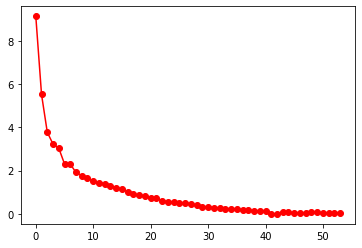

In [77]:
plt.plot(eigval, 'ro-')

In [78]:
projX1 = data.dot(eigvec.T[0]) / np.linalg.norm(eigvec.T[0])
result = pd.DataFrame(projX1, columns=['PC1'])

In [79]:
projX2 = data.dot(eigvec.T[1]) / np.linalg.norm(eigvec.T[1])
result['PC2'] = projX2

In [80]:
result['target'] = target

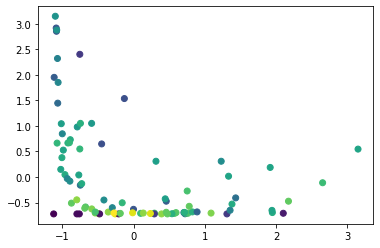

In [81]:
plt.scatter(data[:, 0], data[:, 1], c=target)

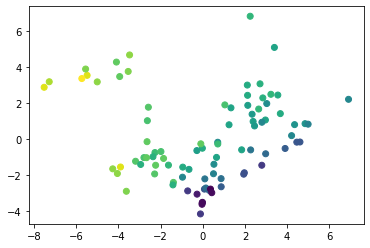

In [82]:
plt.scatter(result.PC1, result.PC2, c=target)

#### 주성분분석 2

In [117]:
# data1 = StandardScaler().fit_transform(data)
# 표준화시킨 후 주성분 분석시 설명력이 떨어지기 때문에 표준화 과정을 생략 

In [123]:
pca = PCA()
pcaXY = pca.fit_transform(data)

In [124]:
np.set_printoptions(formatter={'float_kind':'{:.3f}'.format}, suppress = True)

In [125]:
pca.explained_variance_ratio_

array([0.394, 0.242, 0.109, 0.081, 0.071, 0.035, 0.014, 0.011, 0.009,
       0.008, 0.005, 0.004, 0.004, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000])

In [127]:
np.sum(pca.explained_variance_ratio_[:3]) # 74%의 설명력 가짐

0.7448981110837313

#### 고유값/ 고유벡터 찾아보기
+ Ax = λx (ㅎ키 누른 후 한자 키)
+ 선형변환 A = [[3,1], [1,3]]을 만족하는 고유벡터 x와 고유값 λ은?

In [83]:
A = [[3,1], [1,3]]  # 선형변환
x1 = [-1, 1]
x2 = [1, 1]
x3 = np.dot(A, x1) # 행렬 곱연산, 선형변환 적용
x4 = np.dot(A, x2)
origin = [0], [0]  # 벡터공간 원점 정의

#### 변환전 벡터
+ quiver 함수 : 그래프에 화살표 벡터를 표시
+ quiver(원점, x좌표, y좌표, 색상, 각도, 단위)

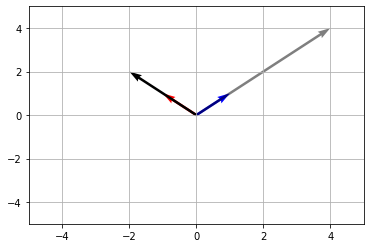

In [95]:
plt.quiver(*origin, x1[0], x1[1], color = 'r', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, x2[0], x2[1], color = 'b', angles='xy', scale_units='xy', scale=1)
# 변환후 벡터
plt.quiver(*origin, x3[0], x3[1], color = 'k', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, x4[0], x4[1], color = 'k', alpha=0.5, angles='xy', scale_units='xy', scale=1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)

#### numpy 함수로 고유값/고유벡터 알아내기

In [100]:
np.set_printoptions(formatter={'float_kind':'{:.0f}'.format}, suppress = True)

In [101]:
A = np.array([[3,1],[1,3]])
np.linalg.eig(A)

(array([4, 2]),
 array([[1, -1],
        [1, 1]]))

In [102]:
A = np.array([[3,1],[1,3]])
eigval, eigvec = np.linalg.eig(A)
eigval, eigvec

(array([4, 2]),
 array([[1, -1],
        [1, 1]]))

### 지도학습 데이터를 대상으로 차원축소하고 싶은 경우
+ 선형판별분석 LDA